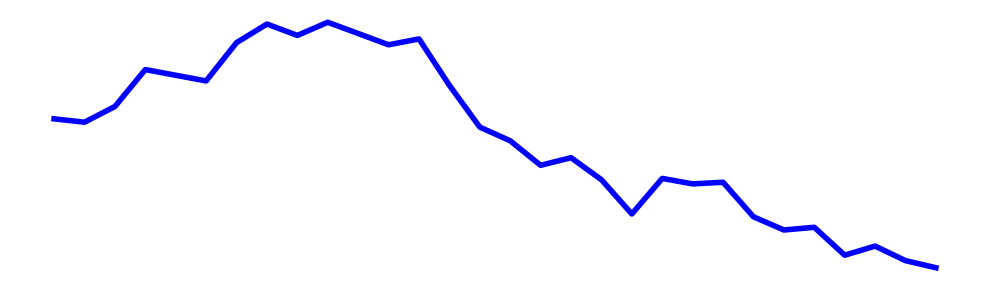

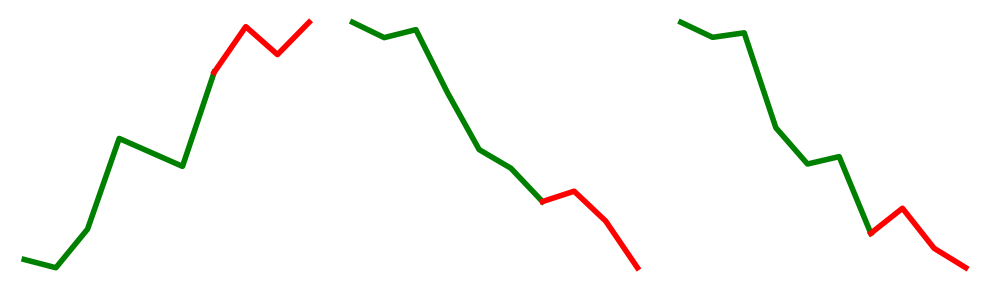

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generate date range (30 days)
date_range = pd.date_range(start="2025-04-01", periods=30, freq='D')

# Generate random data as time series values
np.random.seed(42)
values = np.random.randn(30).cumsum()  # Cumulative sum to create trend-like data

# Create DataFrame
df = pd.DataFrame({"Date": date_range, "Value": values})

# Plot 1: Simple blue time series without axes or labels (full period)
plt.figure(figsize=(10, 3), facecolor='none')  # Transparent figure background
plt.plot(df["Date"], df["Value"], color='blue', linewidth=4)  # Increased line width
plt.axis('off')  # Turn off all axes
plt.tight_layout()
plt.savefig('full_timeseries.png', transparent=True, bbox_inches='tight')
plt.show()

# Plot 2: Create 3 subplots with 10-day periods, same total figure size
fig = plt.figure(figsize=(10, 3), facecolor='none')  # Transparent figure background

# Create 3 subplots
for i in range(3):
    # Calculate the date range for this subplot (10 days each)
    start_idx = i * 10
    end_idx = start_idx + 10
    if end_idx > len(df):  # Ensure we don't go out of bounds
        end_idx = len(df)

    # Extract the 10-day period
    period_df = df.iloc[start_idx:end_idx]

    # Create subplot
    ax = plt.subplot(1, 3, i+1)
    ax.set_facecolor('none')  # Transparent subplot background

    # Calculate the 80% split point for this period
    split_point = int(len(period_df) * 0.6)

    # Plot the first 80% in green with increased line width
    plt.plot(period_df["Date"][:split_point+1],
            period_df["Value"][:split_point+1],
            color='green', linewidth=4)

    # Plot the last 20% in red with increased line width
    plt.plot(period_df["Date"][split_point:],
            period_df["Value"][split_point:],
            color='red', linewidth=4)

    plt.axis('off')  # Turn off all axes

plt.tight_layout()
plt.savefig('subplots_timeseries.png', transparent=True, bbox_inches='tight')
plt.show()